In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from model import *
from data import *
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt

In [2]:
data = pd.read_csv('result.csv',encoding = 'unicode_escape')
data.iloc[:5]

,Station_Name,Date,Max_Temp,Min_Temp,Avg_Temp,Sum_Fall,Kind_of_Fall,Avg_Temp_Pre_Day
0,GDAÑSK-RÊBIECHOWO,01-01-2020,4.5,-0.9,2.2,0.0,NaN,2.0
1,GDAÑSK-RÊBIECHOWO,02-01-2020,5.0,-1.3,1.9,0.0,NaN,2.2
2,GDAÑSK-RÊBIECHOWO,03-01-2020,3.5,-0.8,1.7,2.2,W,1.9
3,GDAÑSK-RÊBIECHOWO,04-01-2020,4.3,0.1,2.3,5.5,S,1.7
4,GDAÑSK-RÊBIECHOWO,05-01-2020,1.8,-1.8,-0.2,0.3,S,2.3


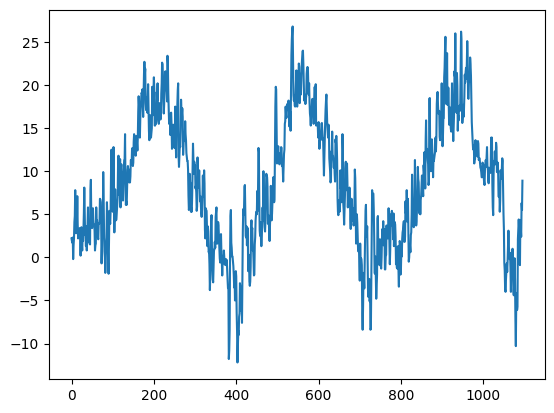

In [3]:
x = np.arange(len(data))
y = np.array(data['Avg_Temp'])
plt.plot(x, y)

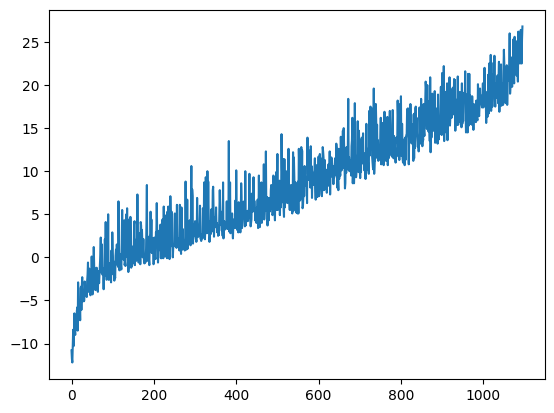

In [4]:
data_sorted = data.sort_values("Min_Temp", ascending=True)
x = np.arange(len(data_sorted))
y = np.array(data_sorted['Avg_Temp'])
plt.plot(x, y)

LINEAR REGRESSION

In [5]:
data = get_data()

train_data, test_data = split_data(data)

x_train = train_data["Avg_Temp_Pre_Day"].to_numpy()
y_train = train_data["Avg_Temp"].to_numpy()

x_test = test_data["Avg_Temp_Pre_Day"].to_numpy()
y_test = test_data["Avg_Temp"].to_numpy()

In [6]:
linear = LinearReg()
linear.fit(x_train, y_train)

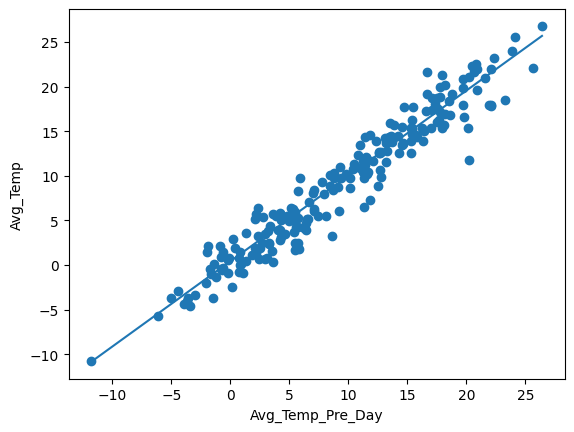

In [7]:
x = np.linspace(min(x_test), max(x_test), 100)
y = float(linear.get_theta()[0]) + float(linear.get_theta()[1]) * x
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.xlabel('Avg_Temp_Pre_Day')
plt.ylabel('Avg_Temp')
plt.show()

In [8]:
print(linear)
print("MSE: ", linear.mse(x_test, y_test))
print("MAE: ", linear.mae(x_test, y_test))

0 = [0.95691274]x + [0.41918928]y
MSE:  [3.59742175]
MAE:  [1.45749946]


AUTO LINEAR REGRESSIVE

In [9]:
data = get_data()

train_data, test_data = split_data_asc(data)

x_train = train_data["Avg_Temp_Pre_Day"].to_numpy()
y_train = train_data["Avg_Temp"].to_numpy()

x_test = test_data["Avg_Temp_Pre_Day"].to_numpy()
y_test = test_data["Avg_Temp"].to_numpy()

In [10]:
linear = AutoReg(7)
y_pred = []
x_test_temp = x_test.copy()
y_test_temp = y_test.copy()

for i in range(len(x_test)): 
    linear.fit(x_train[-linear.get_lag():], y_train[-linear.get_lag():])
    y_pred.append(linear.predict(x_test_temp[0]))
    x_train = np.append(x_train, x_test_temp[0])
    y_train = np.append(y_train, y_test_temp[0])
    x_test_temp = np.delete(x_test_temp, 0)
    y_test_temp = np.delete(y_test_temp, 0)


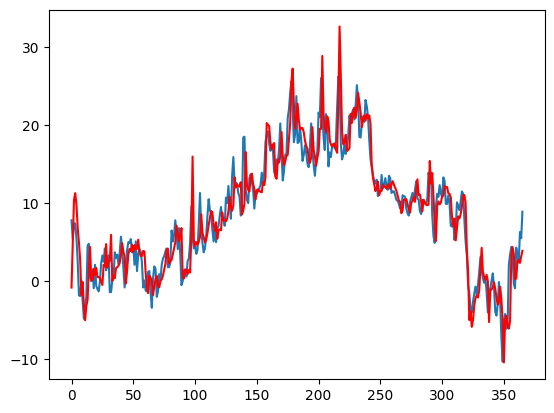

In [11]:
x = np.arange(len(x_test))
plt.plot(x, y_test)
plt.plot(x, y_pred, color="red")
plt.show()

In [12]:
print("MSE: ", linear.mse(x_test, y_test, y_pred))
print("MAE: ", linear.mae(x_test, y_test, y_pred))

MSE:  [7.50727395]
MAE:  [2.05013974]


AUTO LINEAR REGRESSIVE WITH GIT

In [13]:
data = get_data()

train_data, test_data = split_data_asc(data)

x_train = train_data["Avg_Temp_Pre_Day"].to_numpy()
y_train = train_data["Avg_Temp"].to_numpy()

x_test = test_data["Avg_Temp_Pre_Day"].to_numpy()
y_test = test_data["Avg_Temp"].to_numpy()

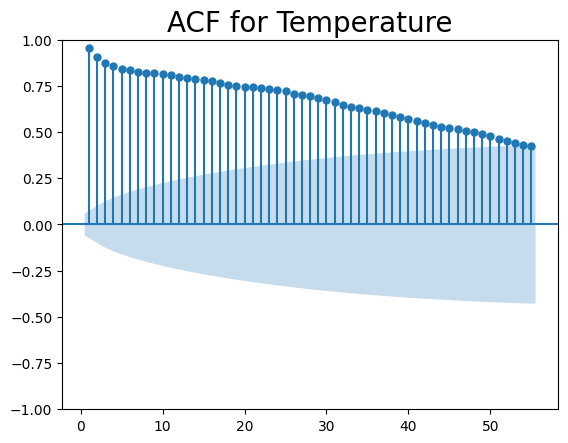

In [14]:
sgt.plot_acf(data['Avg_Temp'], zero=False, lags="55")
plt.title("ACF for Temperature", size=20)
plt.show()

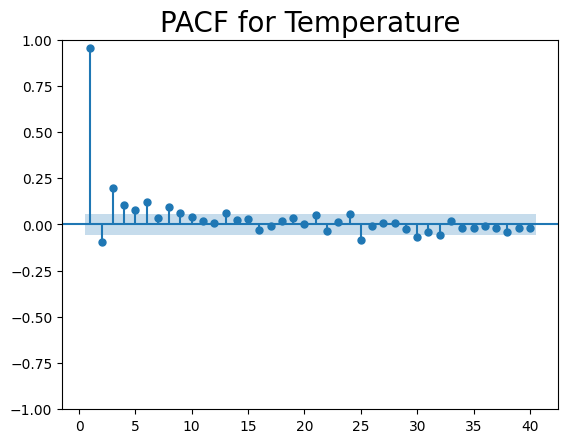

In [15]:
sgt.plot_pacf(data['Avg_Temp'], lags=40, alpha=0.05, zero = False, method = ('ols'))
plt.title("PACF for Temperature", size=20)
plt.show()

# It show that we should use lag on 24, after this number there is too much negatives 
# The best lag is 6/8/13

In [16]:
linear = AutoReg()
y_pred = []

x_test = standardize(x_test, x_train)
y_test = standardize(y_test, y_train)
x_train = standardize(x_train, x_train)
y_train = standardize(y_train, y_train)
x_test_temp = x_test.copy()
y_test_temp = y_test.copy()


In [17]:
for i in range(len(x_test)): 
    linear.fit_with_git2(x_train, y_train, 15)
    y_pred.append(linear.predict(x_test_temp[0]))
    x_train = np.append(x_train, x_test_temp[0])
    y_train = np.append(y_train, y_test_temp[0])
    x_test_temp = np.delete(x_test_temp, 0)
    y_test_temp = np.delete(y_test_temp, 0)


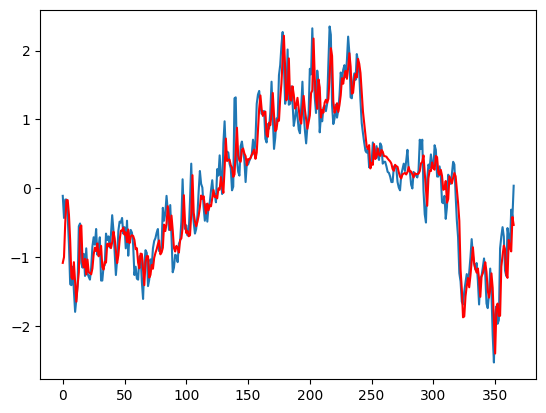

In [18]:
x = np.arange(len(x_test))
plt.plot(x, y_test)
plt.plot(x, y_pred, color="red")
plt.show()

In [19]:
print("MSE: ", linear.mse(x_test, y_test, y_pred))
print("MAE: ", linear.mae(x_test, y_test, y_pred))

MSE:  [0.09724419]
MAE:  [0.23861768]
